In [1]:
# ! pip3 install shap

In [2]:
from src.student_exam_result import StudentExamResultFramework

# Brief

# MLOPs - Student Exam Results
Toy example for predicting Student Exam Results


### Intro

The `student_exam_result.py` contains all the definitions and classes for the _Student Exam Result_ project.

The notebook `Student_Exam_Result.ipynb` is used to demonstrate the usage of the code.

Below, we use the same dataset to build multiple models (_LogisticRegression_) each responsible for predicting categorical encoded values of:
- `MatchScore`
- `WritingScore`
- `ReadingScore`


### `StudentExamResultFramework` class
This class is the main class for the framework. It has a main method `run_pipeline()` which runs the whole system pipeline including:
- Analyzing data
- Cleaning data
- Splitting dataset to train and test sets
- Training the model
- Evaluating the model on the test data
- Run Explainable AI module on the output model using `shapely`
- Encrypts/Decrypts the dataset

#### Constructor
The constructor takes the student exam result CSV dataset path (`csv_file_path`), and number of bins for the target score we want to predict (`nb_bins`).

#### `run_pipeline()`
This is the main method in the class, and it takes one argument (`target_column`) which is the target column in the dataset that we want to predict. The possible values are:
- "MathScore"
- "WritingScore"
- "ReadingScore"

When selecting one of these target columns, the column will be encoded categorically, and the model will be trained to predict the categories. The number of categories is set by `nb_bins`. By default, the number of bins (classes) is `5` which represents the following categories:
- 0: (0 - 20]
- 1: (20 - 40]
- 2: (40 - 60]
- 3: (60 - 80]
- 4: (80 - 100]

You can choose a higher number of bins which will have more bins with smaller score intervals. Or, choose a lower number of bins which will have fewer bins with larger score intervals.

### Dataset
- students-exam-scores
- Kaggle link: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

### CI/CD
Provided a yaml file `.github/workflows/app.yml` configuring a build run before authorizing a commit. The workflow runs tests configured in `tests/test_student_framework.py` using pytest.

# Code Usage

## Predicting `MatchScore`

Data Analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix:
[[   0    5    4    0    0]
 [   0   21  216    0    0]
 [   1    4 1116  321    0]
 [   1    0  196 1822  168]
 [   0    0    0  251  685]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      0.09      0.16       237
           2       0.73      0.77      0.75      1442
           3       0.76      0.83      0.80      2187
           4       0.80      0.73      0.77       936

    accuracy                           0.76      4811
   macro avg       0.60      0.49      0.49      4811
weighted avg       0.76      0.76      0.74      4811



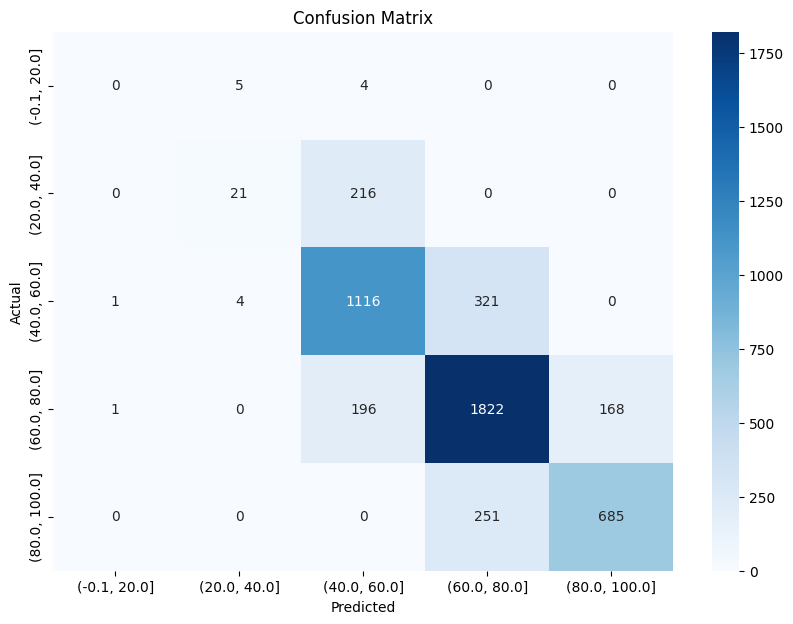

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


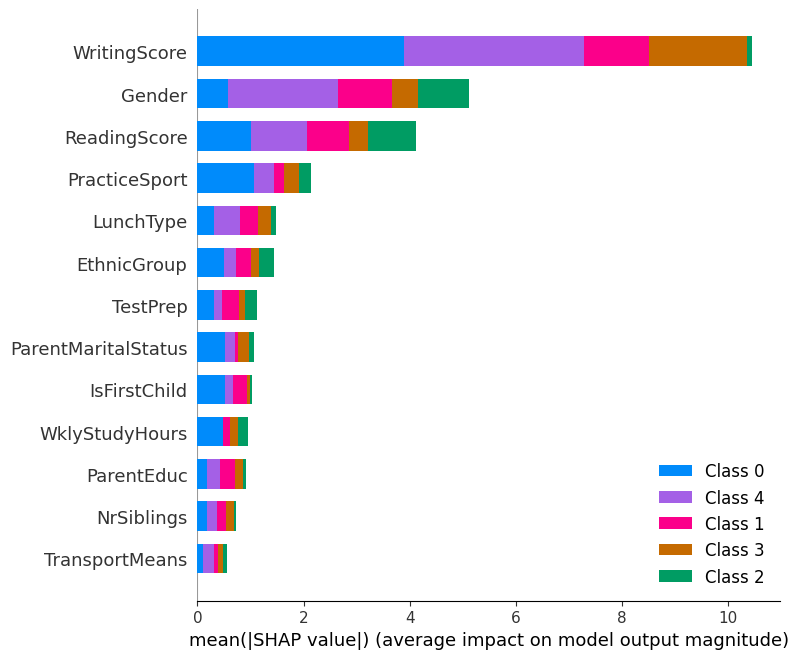

Data decrypted successfully.


In [3]:
data_csv_path = 'data/Expanded_data_with_more_features.csv'

ser_driver = StudentExamResultFramework(data_csv_path)

# target_column = 'ReadingScore'
# target_column = 'WritingScore'
target_column = 'MathScore'

ser_driver.run_pipeline(target_column)

## Predicting `ReadingScore`

Data Analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix:
[[   8    9    5    0    0]
 [   7  145  152    0    0]
 [   3   86 1145  234    0]
 [   0    1  193 1706  138]
 [   0    0    0  170  809]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        22
           1       0.60      0.48      0.53       304
           2       0.77      0.78      0.77      1468
           3       0.81      0.84      0.82      2038
           4       0.85      0.83      0.84       979

    accuracy                           0.79      4811
   macro avg       0.69      0.66      0.67      4811
weighted avg       0.79      0.79      0.79      4811



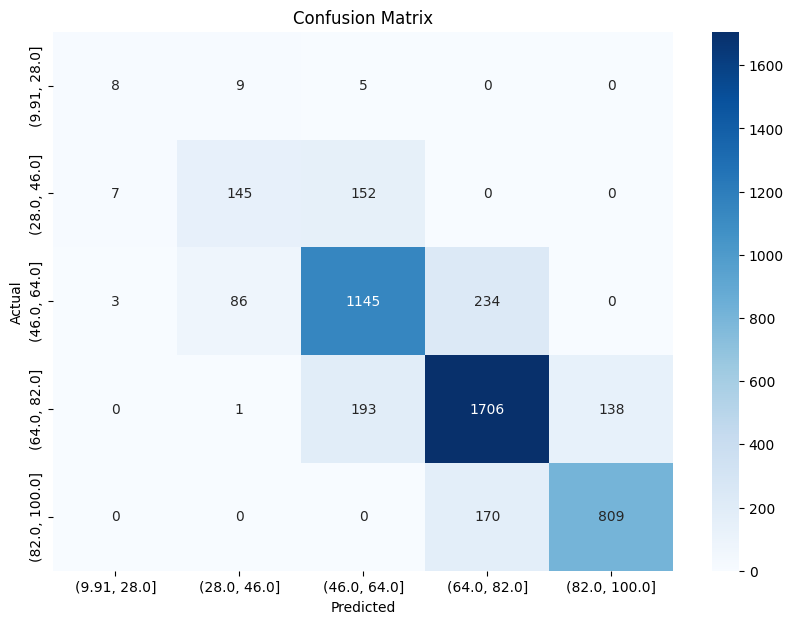

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


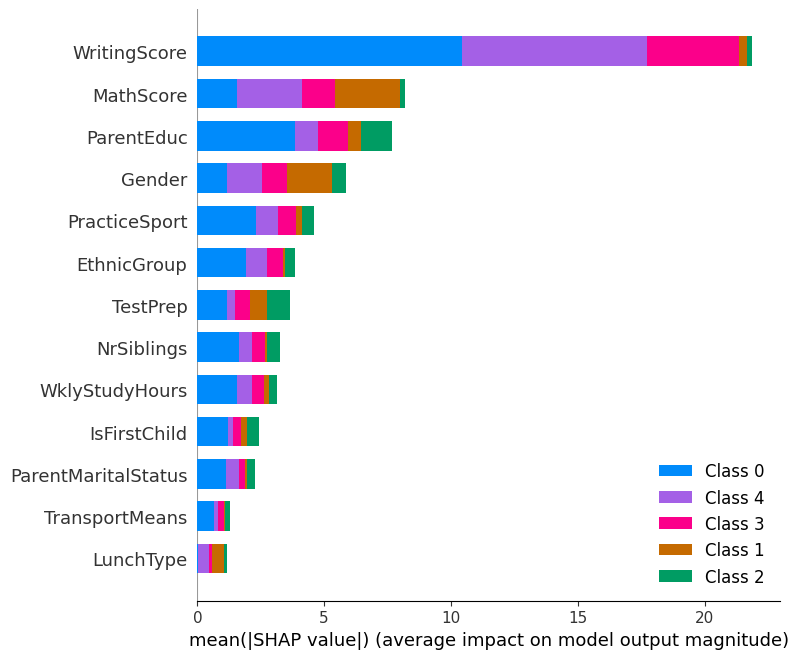

Data decrypted successfully.


In [5]:
data_csv_path = 'data/Expanded_data_with_more_features.csv'

ser_driver = StudentExamResultFramework(data_csv_path)

target_column = 'ReadingScore'

ser_driver.run_pipeline(target_column)

## Predicting `WritingScore`

Data Analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Confusion Matrix:
[[   6    8    0    0    0]
 [   6  125  115    0    0]
 [   0   36 1082  184    0]
 [   0    0  160 1867  123]
 [   0    0    0  151  948]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        14
           1       0.74      0.51      0.60       246
           2       0.80      0.83      0.81      1302
           3       0.85      0.87      0.86      2150
           4       0.89      0.86      0.87      1099

    accuracy                           0.84      4811
   macro avg       0.75      0.70      0.72      4811
weighted avg       0.84      0.84      0.84      4811



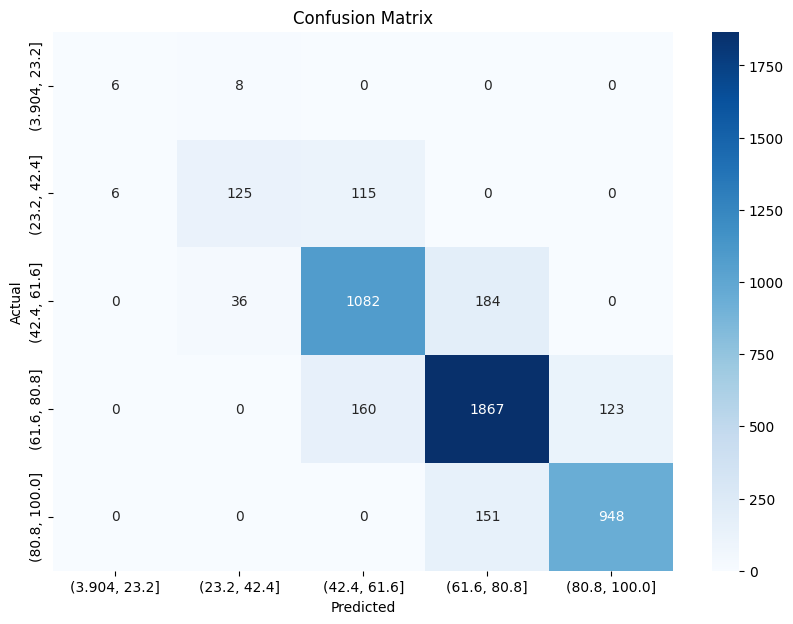

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


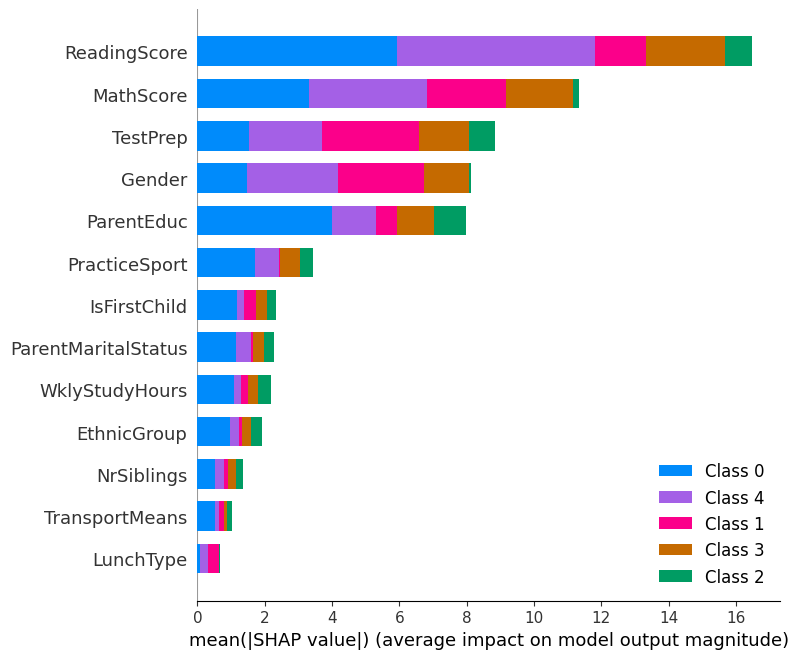

Data decrypted successfully.


In [7]:
data_csv_path = 'data/Expanded_data_with_more_features.csv'

ser_driver = StudentExamResultFramework(data_csv_path)

target_column = 'WritingScore'

ser_driver.run_pipeline(target_column)